<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gafs_rnn_encoder_decoder_cslr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp ./drive/MyDrive/Datasets/gafs_dataset_very_small.zip gafs_dataset.zip

In [ ]:
!unzip -o gafs_dataset.zip

Archive:  gafs_dataset.zip
   creating: gafs_dataset_very_small/
  inflating: gafs_dataset_very_small/0.hdf5  
  inflating: gafs_dataset_very_small/1.hdf5  
  inflating: gafs_dataset_very_small/10.hdf5  
  inflating: gafs_dataset_very_small/102.hdf5  
  inflating: gafs_dataset_very_small/105.hdf5  
  inflating: gafs_dataset_very_small/107.hdf5  
  inflating: gafs_dataset_very_small/109.hdf5  
  inflating: gafs_dataset_very_small/112.hdf5  
  inflating: gafs_dataset_very_small/113.hdf5  
  inflating: gafs_dataset_very_small/115.hdf5  
  inflating: gafs_dataset_very_small/117.hdf5  
  inflating: gafs_dataset_very_small/121.hdf5  
  inflating: gafs_dataset_very_small/122.hdf5  
  inflating: gafs_dataset_very_small/125.hdf5  
  inflating: gafs_dataset_very_small/128.hdf5  
  inflating: gafs_dataset_very_small/13.hdf5  
  inflating: gafs_dataset_very_small/135.hdf5  
  inflating: gafs_dataset_very_small/136.hdf5  
  inflating: gafs_dataset_very_small/138.hdf5  
  inflating: gafs_dataset_ver

In [ ]:
!ls gafs_dataset_very_small

0.hdf5	  135.hdf5  160.hdf5  1.hdf5	236.hdf5  43.hdf5  80.hdf5
102.hdf5  136.hdf5  161.hdf5  202.hdf5	239.hdf5  4.hdf5   81.hdf5
105.hdf5  138.hdf5  168.hdf5  203.hdf5	241.hdf5  53.hdf5  88.hdf5
107.hdf5  13.hdf5   169.hdf5  20.hdf5	242.hdf5  56.hdf5  89.hdf5
109.hdf5  141.hdf5  171.hdf5  216.hdf5	246.hdf5  59.hdf5  92.hdf5
10.hdf5   143.hdf5  176.hdf5  217.hdf5	24.hdf5   63.hdf5  93.hdf5
112.hdf5  145.hdf5  178.hdf5  219.hdf5	251.hdf5  68.hdf5  95.hdf5
113.hdf5  147.hdf5  181.hdf5  21.hdf5	254.hdf5  6.hdf5   9.hdf5
115.hdf5  151.hdf5  186.hdf5  223.hdf5	25.hdf5   70.hdf5  character_to_prediction_index.json
117.hdf5  153.hdf5  187.hdf5  225.hdf5	27.hdf5   71.hdf5  LICENSE.txt
121.hdf5  154.hdf5  188.hdf5  227.hdf5	2.hdf5	  72.hdf5
122.hdf5  157.hdf5  18.hdf5   230.hdf5	36.hdf5   73.hdf5
125.hdf5  158.hdf5  192.hdf5  231.hdf5	38.hdf5   74.hdf5
128.hdf5  15.hdf5   196.hdf5  233.hdf5	40.hdf5   76.hdf5


In [ ]:
!cat gafs_dataset_very_small/character_to_prediction_index.json

{" ":0,"!":1,"#":2,"$":3,"%":4,"&":5,"'":6,"(":7,")":8,"*":9,"+":10,",":11,"-":12,".":13,"\/":14,"0":15,"1":16,"2":17,"3":18,"4":19,"5":20,"6":21,"7":22,"8":23,"9":24,":":25,";":26,"=":27,"?":28,"@":29,"[":30,"_":31,"a":32,"b":33,"c":34,"d":35,"e":36,"f":37,"g":38,"h":39,"i":40,"j":41,"k":42,"l":43,"m":44,"n":45,"o":46,"p":47,"q":48,"r":49,"s":50,"t":51,"u":52,"v":53,"w":54,"x":55,"y":56,"z":57,"~":58}

In [ ]:
!cat gafs_dataset_very_small/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GASF very small dataset
Original licenser: Google LLC
Modification
- Extract only 1 parquet file.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("gafs_dataset_very_small/0.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys[:10])
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1720198121', '1722303176', '1723157122', '1731934631', '1737624109', '1739256200', '1743069372', '1743412187', '1744795751', '1746320345']
<KeysViewHDF5 ['feature', 'token']>
(2, 271, 543)
[14 38 32 45 44 36 40 32 43 43 36 56 14 43 40 45 32 12 34 32 49 50 51 36
 45 50]


In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.3.4.zip -O master.zip

--2024-09-10 06:19:15--  https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.3.4.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.3.4 [following]
--2024-09-10 06:19:15--  https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.3.4
Resolving codeload.github.com (codeload.github.com)... 140.82.116.10
Connecting to codeload.github.com (codeload.github.com)|140.82.116.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [           <=>      ]  76.54M  17.8MB/s    in 4.3s    

2024-09-10 06:19:20 (17.8 MB/s) - ‘master.zip’ saved [80254068]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
3406d5a0072e08879272e622ff8efdc1c7b78ee8
   creating: master/trado_samples-0.3.4/
  inflating: master/trado_samples-0.3.4/.gitignore  
  inflating: master/trado_samples-0.3.4/LICENSE  
  inflating: master/trado_samples-0.3.4/README.md  
   creating: master/trado_samples-0.3.4/colab_files/
 extracting: master/trado_samples-0.3.4/colab_files/.gitkeep  
  inflating: master/trado_samples-0.3.4/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-0.3.4/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-0.3.4/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-0.3.4/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-0.3.4/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-0.3.4/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-0.3.4/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-0.3.4/colab_files/exp_track_affi

In [ ]:
!mv master/trado_samples-0.3.4/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gafs_dataset_very_small.zip

In [ ]:
!ls

drive  gafs_dataset_very_small	gafs_dataset.zip  modules_gislr  sample_data


# 2. Load library

In [ ]:
import copy
import json
import os
import sys
import time
from functools import partial
from inspect import signature
from pathlib import Path

# Third party's modules
import numpy as np

import torch

from nltk.metrics.distance import edit_distance

from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    RNNEncoder,
    apply_norm,
    create_norm
)
from modules_gislr.train_functions import (
    LabelSmoothingCrossEntropyLoss
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)
from modules_gislr.utils import (
    select_reluwise_activation
)

# 3. Implement RNN Encoder-Decoder CSLR model

### Attention module

In [ ]:
class BahdanauAttentionEnergy(nn.Module):
    def __init__(self,
                 key_dim,
                 query_dim,
                 att_dim,
                 add_bias=False):
        super().__init__()

        self.w_key = nn.Linear(key_dim, att_dim, bias=add_bias)
        self.w_query = nn.Linear(query_dim, att_dim, bias=add_bias)
        self.w_out = nn.Linear(att_dim, 1, bias=add_bias)

    def forward(self, key, query):
        # key: `[N, key_len, key_dim]`
        # query: `[N, 1, query_dim]`
        key = self.w_key(key)
        query = self.w_query(query)
        # Adding with broadcasting.
        # key: `[N, key_len, key_dim]`
        # query: `[N, 1, query_dim]`
        # query should be broadcasted to `[N, key_len, query_dim]`
        temp = key + query
        # `[N, key_len, att_dim] -> [N, key_len, 1] -> [N, 1, key_len]`
        energy = self.w_out(torch.tanh(temp))
        energy = torch.permute(energy, [0, 2, 1])
        return energy

In [ ]:
class SingleHeadAttention(nn.Module):
    def __init__(self,
                 key_dim,
                 query_dim,
                 att_dim,
                 add_bias):
        super().__init__()

        self.att_energy = BahdanauAttentionEnergy(
            key_dim=key_dim,
            query_dim=query_dim,
            att_dim=att_dim,
            add_bias=add_bias)

        self.neg_inf = None

    def forward(self,
                key,
                value,
                query,
                mask=None):
        if self.neg_inf is None:
            self.neg_inf = float(np.finfo(
                torch.tensor(0, dtype=key.dtype).numpy().dtype).min)

        batch, klen, kdim = key.shape
        _, qlen, qdim = query.shape
        energy = self.att_energy(key=key, query=query)
        assert energy.shape == (batch, qlen, klen)

        # Apply mask.
        if mask is not None:
            if len(mask.shape) == 2:
                # `[N, klen] -> [N, qlen(=1), klen]`
                mask = mask.unsqueeze(1)
            # Negative infinity should be 0 in softmax.
            energy = energy.masked_fill_(mask==0, self.neg_inf)

        # Compute attention mask.
        attw = torch.softmax(energy, dim=-1)
        # attw: `[N, qlen, klen]`
        # value: `[N, klen, kdim]`
        # bmm: `[N, qlen, klen] x [N, klen, kdim] -> [N, qlen, kdim]`
        cvec = torch.bmm(attw, value)
        return cvec, attw

### RNN Decoder

In [ ]:
class BahdanauRNNDecoder(nn.Module):
    def __init__(self,
                 in_channels,
                 hidden_channels,
                 out_channels,
                 emb_channels,
                 att_dim,
                 att_add_bias,
                 rnn_type,
                 num_layers,
                 activation,
                 dropout,
                 padding_val,
                 proj_size=0):
        super().__init__()
        assert rnn_type in ["srnn", "lstm", "gru"]

        self.emb_layer = nn.Embedding(
            num_embeddings=out_channels,
            embedding_dim=emb_channels,
            padding_idx=padding_val)

        self.att_layer = SingleHeadAttention(
            key_dim=in_channels,
            query_dim=hidden_channels,
            att_dim=att_dim,
            add_bias=att_add_bias)

        if rnn_type == "srnn":
            self.rnn = nn.RNN(input_size=in_channels + emb_channels,
                              hidden_size=hidden_channels,
                              num_layers=num_layers,
                              nonlinearity=activation,
                              batch_first=True,
                              dropout=dropout,
                              bidirectional=False)
        elif rnn_type == "lstm":
            self.rnn = nn.LSTM(input_size=in_channels + emb_channels,
                               hidden_size=hidden_channels,
                               num_layers=num_layers,
                               batch_first=True,
                               dropout=dropout,
                               bidirectional=False,
                               proj_size=proj_size)
        elif rnn_type == "gru":
            self.rnn = nn.GRU(input_size=in_channels + emb_channels,
                              hidden_size=hidden_channels,
                              num_layers=num_layers,
                              batch_first=True,
                              dropout=dropout,
                              bidirectional=False)
        self.head = nn.Linear(hidden_channels, out_channels)

        self.num_layers = num_layers
        self.dec_hstate = None
        self.attw = None

    def init_dec_hstate(self, enc_hstate, init_as_zero=False):
        if init_as_zero:
            dec_hstate = torch.zeros_like(enc_hstate)
        else:
            dec_hstate = enc_hstate
        # To avoid error at RNN layer.
        self.dec_hstate = dec_hstate.contiguous()

    def forward(self,
                dec_inputs,
                enc_seqs,
                enc_mask):
        assert self.dec_hstate is not None, f"dec_hstate has not been initialized."
        dec_hstate = self.dec_hstate

        # Attention layer requires hidden state of 2nd rnn layer.
        # as `[N, 1, C]`
        query = dec_hstate[-1].unsqueeze(1)
        cvec, self.attw = self.att_layer(
            key=enc_seqs,
            value=enc_seqs,
            query=query,
            mask=enc_mask)

        emb_out = self.emb_layer(dec_inputs)
        # `[N, C] -> [N, 1, C]`
        emb_out = emb_out.reshape([-1, 1, emb_out.shape[-1]])
        feature = torch.cat([cvec, emb_out], dim=-1)
        if isinstance(self.rnn, nn.LSTM):
            hidden_seqs, (last_hstate, last_cstate) = self.rnn(feature,
                                                               dec_hstate)
        else:
            hidden_seqs, last_hstate = self.rnn(feature,
                                                dec_hstate)
            last_cstate = None

        output_dec = self.head(hidden_seqs)
        self.dec_hstate = last_hstate
        return output_dec

### RNN CSLR model

In [ ]:
class RNNCSLR(nn.Module):
    def __init__(self,
                 enc_in_channels,
                 enc_hidden_channels,
                 enc_rnn_type,
                 enc_num_layers,
                 enc_activation,
                 enc_bidir,
                 enc_dropout,
                 enc_apply_mask,
                 enc_proj_size,
                 dec_in_channels,
                 dec_hidden_channels,
                 dec_out_channels,
                 dec_emb_channels,
                 dec_att_dim,
                 dec_att_add_bias,
                 dec_rnn_type,
                 dec_num_layers,
                 dec_activation,
                 dec_dropout,
                 dec_padding_val,
                 dec_proj_size):
        super().__init__()
        self.enc_bidir = enc_bidir

        self.linear = nn.Linear(enc_in_channels, enc_hidden_channels)
        self.enc_activation = nn.ReLU()

        self.encoder = RNNEncoder(
            in_channels=enc_hidden_channels,
            out_channels=enc_hidden_channels,
            rnn_type=enc_rnn_type,
            num_layers=enc_num_layers,
            activation=enc_activation,
            bidir=enc_bidir,
            dropout=enc_dropout,
            apply_mask=enc_apply_mask,
            proj_size=enc_proj_size)

        if enc_bidir:
            dec_in_channels *= 2
            dec_hidden_channels *= 2
            dec_att_dim *= 2

        self.decoder = BahdanauRNNDecoder(
            in_channels=dec_in_channels,
            hidden_channels=dec_hidden_channels,
            out_channels=dec_out_channels,
            emb_channels=dec_emb_channels,
            att_dim=dec_att_dim,
            att_add_bias=dec_att_add_bias,
            rnn_type=dec_rnn_type,
            num_layers=dec_num_layers,
            activation=dec_activation,
            dropout=dec_dropout,
            padding_val=dec_padding_val,
            proj_size=dec_proj_size)

    def _apply_encoder(self, feature, feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        feature = self.enc_activation(feature)

        # Apply encoder.
        enc_seqs, enc_hstate = self.encoder(feature, feature_pad_mask)[:2]

        # Basically, decoder should not be bidirectional.
        # So, we should concatenate backwarded feature.
        if self.enc_bidir:
            # `[2*layers, N, C] -> [layers, N, 2*C]`
            enc_hstate = torch.permute(enc_hstate, [1, 0, 2])
            enc_hstate = enc_hstate.reshape([enc_hstate.shape[0],
                                             enc_hstate.shape[1] // 2,
                                             -1])
            enc_hstate = torch.permute(enc_hstate, [1, 0, 2])
        return enc_seqs, enc_hstate

    def forward(self,
                feature, tokens,
                feature_pad_mask=None, tokens_pad_mask=None):
        """Forward computation for train.
        """
        enc_seqs, enc_hstate = self._apply_encoder(feature, feature_pad_mask)

        # Apply decoder.
        self.decoder.init_dec_hstate(enc_hstate)
        dec_inputs = tokens[:, 0:1]
        preds = None
        for t_index in range(1, tokens.shape[-1]):
            pred = self.decoder(
                dec_inputs=dec_inputs,
                enc_seqs=enc_seqs,
                enc_mask=feature_pad_mask)
            if preds is None:
                preds = pred
            else:
                # `[N, T, C]`
                preds = torch.cat([preds, pred], dim=1)

            # Teacher forcing.
            dec_inputs = tokens[:, t_index:t_index+1]
        return preds

    def inference(self,
                  feature,
                  start_id,
                  end_id,
                  feature_pad_mask=None,
                  max_seqlen=62):
        """Forward computation for test.
        """
        enc_seqs, enc_hstate = self._apply_encoder(feature, feature_pad_mask)

        # Apply decoder.
        self.decoder.init_dec_hstate(enc_hstate)
        dec_inputs = torch.tensor([start_id]).to(feature.device)
        # `[N, T]`
        dec_inputs = dec_inputs.reshape([1, 1])
        preds = None
        pred_ids = [start_id]
        for _ in range(max_seqlen):
            pred = self.decoder(
                dec_inputs=dec_inputs,
                enc_seqs=enc_seqs,
                enc_mask=feature_pad_mask)
            if preds is None:
                preds = pred
            else:
                # `[N, T, C]`
                preds = torch.cat([preds, pred], dim=1)

            pid = torch.argmax(pred, dim=-1)
            dec_inputs = pid

            pid = pid.reshape([1]).detach().cpu().numpy()[0]
            pred_ids.append(int(pid))
            if int(pid) == end_id:
                break

        # `[N, T]`
        pred_ids = np.array([pred_ids])
        return pred_ids, preds

# 4. Update to train CSLR model

### Add transformation to insert keywords

In [ ]:
class InsertTokensForS2S():
    def __init__(self,
                 sos_token,
                 eos_token,
                 error_at_exist=False):
        self.sos_token = sos_token
        self.eos_token = eos_token
        self.error_at_exist = error_at_exist

    def check_format(self, tokens):
        insert_sos = False
        if tokens[0] != self.sos_token:
            insert_sos = True
        elif self.error_at_exist:
            message = f"The sos_token:{self.sos_token} is exist in {tokens}." \
                + "Please check the format."
            raise ValueError(message)
        insert_eos = False
        if tokens[-1] != self.eos_token:
            insert_eos = True
        elif self.error_at_exist:
            message = f"The eos_token:{self.eos_token} is exist in {tokens}." \
                + "Please check the format."
            raise ValueError(message)
        return insert_sos, insert_eos

    def __call__(self, data):

        tokens = data["token"]
        dtype = tokens.dtype

        insert_sos, insert_eos = self.check_format(tokens)
        # Insert.
        new_tokens = []
        if insert_sos:
            new_tokens.append(self.sos_token)
        new_tokens += tokens.tolist()
        if insert_eos:
            new_tokens.append(self.eos_token)
        new_tokens = np.array(new_tokens, dtype=dtype)
        data["token"] = new_tokens
        return data

### Update merge function to create padded token

In [ ]:
def merge_padded_batch(batch,
                       feature_shape,
                       token_shape,
                       feature_padding_val=0,
                       token_padding_val=0):
    feature_batch = [sample["feature"] for sample in batch]
    token_batch = [sample["token"] for sample in batch]

    # ==========================================================
    # Merge feature.
    # ==========================================================
    # `[B, C, T, J]`
    merged_shape = [len(batch), *feature_shape]
    # Use maximum frame length in a batch as padded length.
    if merged_shape[2] == -1:
        tlen = max([feature.shape[1] for feature in feature_batch])
        merged_shape[2] = tlen
    merged_feature = merge(feature_batch, merged_shape, padding_val=feature_padding_val)

    # ==========================================================
    # Merge tocken.
    # ==========================================================
    # `[B, L]`
    merged_shape = [len(batch), *token_shape]
    # Use maximum token length in a batch as padded length.
    if merged_shape[1] == -1:
        tlen = max([token.shape[0] for token in token_batch])
        merged_shape[1] = tlen
    merged_token = merge(token_batch, merged_shape, padding_val=token_padding_val)

    # Generate padding mask.
    # Pad: 0, Signal: 1
    # The frames which all channels and landmarks are equals to padding value
    # should be padded.
    feature_pad_mask = merged_feature == feature_padding_val
    feature_pad_mask = torch.all(feature_pad_mask, dim=1)
    feature_pad_mask = torch.all(feature_pad_mask, dim=-1)
    feature_pad_mask = torch.logical_not(feature_pad_mask)
    token_pad_mask = torch.logical_not(merged_token == token_padding_val)

    retval = {
        "feature": merged_feature,
        "token": merged_token,
        "feature_pad_mask": feature_pad_mask,
        "token_pad_mask": token_pad_mask}
    return retval

### Update train, validation, and test loops

In [ ]:
def forward(model, feature, tokens, feature_pad_mask, tokens_pad_mask):
    if isinstance(model, RNNCSLR):
        preds = model(feature,
                      tokens,
                      feature_pad_mask=feature_pad_mask,
                      tokens_pad_mask=tokens_pad_mask)
    else:
        raise NotImplementedError(f"Unknown model type:{type(model)}.")
    return preds

In [ ]:
def inference(model, feature, start_id, end_id, max_seqlen=62):
    if isinstance(model, RNNCSLR):
        pred_ids, _ = model.inference(feature,
                                      start_id,
                                      end_id,
                                      max_seqlen=max_seqlen)
    else:
        raise NotImplementedError(f"Unknown model type:{type(model)}.")
    return pred_ids

In [ ]:
def check_tokens_format(tokens, tokens_pad_mask, start_id, end_id):
    # Check token's format.
    end_indices0 = np.arange(len(tokens))
    end_indices1 = tokens_pad_mask.sum(dim=-1).detach().cpu().numpy() - 1
    message = "The start and/or end ids are not included in tokens. " \
        f"Please check data format. start_id:{start_id}, " \
        f"end_id:{end_id}, enc_indices:{end_indices1}, tokens:{tokens}"
    ref_tokens = tokens.detach().cpu().numpy()
    assert (ref_tokens[:, 0] == start_id).all(), message
    assert (ref_tokens[end_indices0, end_indices1] == end_id).all(), message

In [ ]:
def train_loop_csir_s2s(dataloader,
                        model,
                        loss_fn,
                        optimizer,
                        device,
                        start_id,
                        end_id,
                        return_pred_times=False):
    num_batches = len(dataloader)
    train_loss = 0
    size = len(dataloader.dataset)

    # Collect prediction time.
    pred_times = []

    # Switch to training mode.
    model.train()
    # Main loop.
    print("Start training.")
    start = time.perf_counter()
    for batch_idx, batch_sample in enumerate(dataloader):
        feature = batch_sample["feature"]
        feature_pad_mask = batch_sample["feature_pad_mask"]
        tokens = batch_sample["token"]
        tokens_pad_mask = batch_sample["token_pad_mask"]

        check_tokens_format(tokens, tokens_pad_mask, start_id, end_id)

        feature = feature.to(device)
        feature_pad_mask = feature_pad_mask.to(device)
        tokens = tokens.to(device)
        tokens_pad_mask = tokens_pad_mask.to(device)

        frames = feature.shape[-2]

        # Predict.
        pred_start = time.perf_counter()
        preds = forward(model, feature, tokens,
                        feature_pad_mask, tokens_pad_mask)
        pred_end = time.perf_counter()
        pred_times.append([frames, pred_end - pred_start])

        # Compute loss.
        # Preds do not include <start>, so skip that of tokens.
        loss = 0
        if isinstance(loss_fn, nn.CrossEntropyLoss):
            for t_index in range(1, tokens.shape[-1]):
                pred = preds[:, t_index-1, :]
                token = tokens[:, t_index]
                loss += loss_fn(pred, token)
            loss /= tokens.shape[-1]
        # LabelSmoothingCrossEntropyLoss
        else:
            # `[N, T, C] -> [N, C, T]`
            preds = preds.permute([0, 2, 1])
            # Remove prediction after the last token.
            if preds.shape[-1] == tokens.shape[-1]:
                preds = preds[:, :, :-1]
            loss = loss_fn(preds, tokens[:, 1:])

        # Back propagation.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # Print current loss per 100 steps.
        if batch_idx % 100 == 0:
            loss = loss.item()
            steps = batch_idx * len(feature)
            print(f"loss:{loss:>7f} [{steps:>5d}/{size:>5d}]")
    print(f"Done. Time:{time.perf_counter()-start}")
    # Average loss.
    train_loss /= num_batches
    print("Training performance: \n",
          f"Avg loss:{train_loss:>8f}\n")
    pred_times = np.array(pred_times)
    retval = (train_loss, pred_times) if return_pred_times else train_loss
    return retval

In [ ]:
def val_loop_csir_s2s(dataloader,
                      model,
                      loss_fn,
                      device,
                      start_id,
                      end_id,
                      return_pred_times=False):
    num_batches = len(dataloader)
    val_loss = 0

    # Collect prediction time.
    pred_times = []

    # Switch to training mode.
    model.train()
    # Main loop.
    print("Start validation.")
    start = time.perf_counter()
    for batch_idx, batch_sample in enumerate(dataloader):
        feature = batch_sample["feature"]
        feature_pad_mask = batch_sample["feature_pad_mask"]
        tokens = batch_sample["token"]
        tokens_pad_mask = batch_sample["token_pad_mask"]

        check_tokens_format(tokens, tokens_pad_mask, start_id, end_id)

        feature = feature.to(device)
        feature_pad_mask = feature_pad_mask.to(device)
        tokens = tokens.to(device)
        tokens_pad_mask = tokens_pad_mask.to(device)

        frames = feature.shape[-2]

        # Predict.
        pred_start = time.perf_counter()
        preds = forward(model, feature, tokens,
                        feature_pad_mask, tokens_pad_mask)
        pred_end = time.perf_counter()
        pred_times.append([frames, pred_end - pred_start])

        # Compute loss.
        # Preds do not include <start>, so skip that of tokens.
        loss = 0
        if isinstance(loss_fn, nn.CrossEntropyLoss):
            for t_index in range(1, tokens.shape[-1]):
                pred = preds[:, t_index-1, :]
                token = tokens[:, t_index]
                loss += loss_fn(pred, token)
            loss /= tokens.shape[-1]
        # LabelSmoothingCrossEntropyLoss
        else:
            # `[N, T, C] -> [N, C, T]`
            preds = preds.permute([0, 2, 1])
            # Remove prediction after the last token.
            if preds.shape[-1] == tokens.shape[-1]:
                preds = preds[:, :, :-1]
            loss = loss_fn(preds, tokens[:, 1:])

        val_loss += loss.item()
    print(f"Done. Time:{time.perf_counter()-start}")

    # Average loss.
    val_loss /= num_batches
    print("Validation performance: \n",
          f"Avg loss:{val_loss:>8f}\n")
    pred_times = np.array(pred_times)
    retval = (val_loss, pred_times) if return_pred_times else val_loss
    return retval

In [ ]:
def test_loop_csir_s2s(dataloader,
                       model,
                       device,
                       start_id,
                       end_id,
                       use_normalized_wer=False,
                       return_pred_times=False,
                       max_seqlen=62):
    size = len(dataloader.dataset)
    total_wer = 0

    # Collect prediction time.
    pred_times = []

    # Switch to training mode.
    model.train()
    # Main loop.
    print("Start test.")
    start = time.perf_counter()
    for batch_idx, batch_sample in enumerate(dataloader):
        feature = batch_sample["feature"]
        tokens = batch_sample["token"]
        tokens_pad_mask = batch_sample["token_pad_mask"]

        check_tokens_format(tokens, tokens_pad_mask, start_id, end_id)

        feature = feature.to(device)
        tokens = tokens.to(device)
        tokens_pad_mask = tokens_pad_mask.to(device)

        frames = feature.shape[-2]

        # Predict.
        pred_start = time.perf_counter()
        pred_ids = inference(model, feature, start_id, end_id, max_seqlen=max_seqlen)
        pred_end = time.perf_counter()
        pred_times.append([frames, pred_end - pred_start])

        # Compute WER.
        # <sos> and <eos> should be removed because they may boost performance.
        # print(tokens)
        # print(pred_ids)
        tokens = tokens[0, 1:-1]
        # pred_ids = pred_ids[0, 1:-1]
        pred_ids = [pid for pid in pred_ids[0] if pid not in [start_id, end_id]]
        if use_normalized_wer:
            ref_length = max(len(pred_ids), len(tokens))
        else:
            ref_length = len(tokens)
        wer = edit_distance(tokens, pred_ids)
        wer /= ref_length
        total_wer += wer
    print(f"Done. Time:{time.perf_counter()-start}")

    # Average WER.
    awer = total_wer / size * 100
    print("Test performance: \n",
          f"Avg WER:{awer:>0.1f}%\n")
    pred_times = np.array(pred_times)
    retval = (awer, pred_times) if return_pred_times else awer
    return retval

# 5. Sanity check

In [ ]:
# Access check.
dataset_dir = Path("gafs_dataset_very_small")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

gafs_dataset_very_small/character_to_prediction_index.json
[PosixPath('gafs_dataset_very_small/10.hdf5'), PosixPath('gafs_dataset_very_small/138.hdf5'), PosixPath('gafs_dataset_very_small/225.hdf5'), PosixPath('gafs_dataset_very_small/145.hdf5'), PosixPath('gafs_dataset_very_small/136.hdf5'), PosixPath('gafs_dataset_very_small/202.hdf5'), PosixPath('gafs_dataset_very_small/178.hdf5'), PosixPath('gafs_dataset_very_small/233.hdf5'), PosixPath('gafs_dataset_very_small/59.hdf5'), PosixPath('gafs_dataset_very_small/53.hdf5'), PosixPath('gafs_dataset_very_small/80.hdf5'), PosixPath('gafs_dataset_very_small/223.hdf5'), PosixPath('gafs_dataset_very_small/9.hdf5'), PosixPath('gafs_dataset_very_small/216.hdf5'), PosixPath('gafs_dataset_very_small/13.hdf5'), PosixPath('gafs_dataset_very_small/38.hdf5'), PosixPath('gafs_dataset_very_small/192.hdf5'), PosixPath('gafs_dataset_very_small/112.hdf5'), PosixPath('gafs_dataset_very_small/43.hdf5'), PosixPath('gafs_dataset_very_small/109.hdf5'), PosixPath

In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)
# Add keywords.
key2token["<sos>"] = VOCAB
key2token["<eos>"] = VOCAB + 1
key2token["<pad>"] = VOCAB + 2
# Reset.
VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")
trans_insert_token = InsertTokensForS2S(sos_token=key2token["<sos>"], eos_token=key2token["<eos>"])

pre_transforms = Compose([
    trans_select_feature,
    trans_repnan,
    trans_insert_token,
    trans_norm
])

train_transforms = Compose([
    ToTensor()
])

val_transforms = Compose([
    ToTensor()
])

test_transforms = Compose([
    ToTensor()
])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (-1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=key2token["<pad>"])

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=train_transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]
    tokens_origin = data["token"]

    print(feature_origin.shape)
    print(tokens_origin)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 177, 130])
tensor([[59, 23, 17,  0, 46, 42, 43, 32, 54, 32, 39, 32,  0, 43, 32, 45, 36, 60,
         61, 61, 61, 61],
        [59, 16, 21, 21, 23,  0, 43, 32, 33, 52, 49, 45, 52, 44,  0, 50, 51, 49,
         36, 36, 51, 60]])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
out_channels = VOCAB
enc_hidden_channels = 64
dec_hidden_channels = 64
dec_emb_channels = 4
dec_att_dim = 64
model = RNNCSLR(
    enc_in_channels=in_channels,
    enc_hidden_channels=enc_hidden_channels,
    enc_rnn_type="gru",
    enc_num_layers=2,
    enc_activation="relu",
    enc_bidir=True,
    enc_dropout=0.1,
    enc_apply_mask=True,
    enc_proj_size=0,
    dec_in_channels=enc_hidden_channels,
    dec_hidden_channels=dec_hidden_channels,
    dec_out_channels=out_channels,
    dec_emb_channels=dec_emb_channels,
    dec_att_dim=dec_att_dim,
    dec_att_add_bias=True,
    dec_rnn_type="gru",
    dec_num_layers=2,
    dec_activation="relu",
    dec_dropout=0.1,
    dec_padding_val=key2token["<pad>"],
    dec_proj_size=0)

print(model)

# Sanity check.
sample = next(iter(dataloader))
logit = model(sample["feature"],
              tokens=sample["token"],
              feature_pad_mask=sample["feature_pad_mask"])
print(logit.shape)

RNNCSLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (enc_activation): ReLU()
  (encoder): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (decoder): BahdanauRNNDecoder(
    (emb_layer): Embedding(62, 4, padding_idx=61)
    (att_layer): SingleHeadAttention(
      (att_energy): BahdanauAttentionEnergy(
        (w_key): Linear(in_features=128, out_features=128, bias=True)
        (w_query): Linear(in_features=128, out_features=128, bias=True)
        (w_out): Linear(in_features=128, out_features=1, bias=True)
      )
    )
    (rnn): GRU(132, 128, num_layers=2, batch_first=True, dropout=0.1)
    (head): Linear(in_features=128, out_features=62, bias=True)
  )
)
torch.Size([2, 21, 62])


# 6. Train and evaluation

## 6.1 Set common parameters

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 0
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4
label_smoothing = 0.1
sos_token = key2token["<sos>"]
eos_token = key2token["<eos>"]
pad_token = key2token["<pad>"]
max_seqlen = 31

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files,
    pre_transforms=pre_transforms, transforms=train_transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files,
    pre_transforms=pre_transforms, transforms=val_transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files,
    pre_transforms=pre_transforms, transforms=test_transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 6.2 Run training process

In [ ]:
model_rnn = RNNCSLR(
    enc_in_channels=in_channels,
    enc_hidden_channels=enc_hidden_channels,
    enc_rnn_type="gru",
    enc_num_layers=2,
    enc_activation="relu",
    enc_bidir=True,
    enc_dropout=0.1,
    enc_apply_mask=True,
    enc_proj_size=0,
    dec_in_channels=enc_hidden_channels,
    dec_hidden_channels=dec_hidden_channels,
    dec_out_channels=out_channels,
    dec_emb_channels=dec_emb_channels,
    dec_att_dim=dec_att_dim,
    dec_att_add_bias=True,
    dec_rnn_type="gru",
    dec_num_layers=2,
    dec_activation="relu",
    dec_dropout=0.1,
    dec_padding_val=pad_token,
    dec_proj_size=0)

print(model_rnn)

loss_fn = LabelSmoothingCrossEntropyLoss(
    ignore_indices=pad_token, reduction="mean_temporal_prior",
    label_smoothing=label_smoothing)
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=lr)

RNNCSLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (enc_activation): ReLU()
  (encoder): RNNEncoder(
    (rnn): GRU(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (decoder): BahdanauRNNDecoder(
    (emb_layer): Embedding(62, 4, padding_idx=61)
    (att_layer): SingleHeadAttention(
      (att_energy): BahdanauAttentionEnergy(
        (w_key): Linear(in_features=128, out_features=128, bias=True)
        (w_query): Linear(in_features=128, out_features=128, bias=True)
        (w_out): Linear(in_features=128, out_features=1, bias=True)
      )
    )
    (rnn): GRU(132, 128, num_layers=2, batch_first=True, dropout=0.1)
    (head): Linear(in_features=128, out_features=62, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model_rnn.to(device)

train_losses = []
val_losses = []
test_wers = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loss, train_times = train_loop_csir_s2s(
        train_dataloader, model_rnn, loss_fn, optimizer, device,
        sos_token, eos_token,
        return_pred_times=True)
    val_loss, val_times = val_loop_csir_s2s(
        val_dataloader, model_rnn, loss_fn, device,
        sos_token, eos_token,
        return_pred_times=True)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        wer, test_times = test_loop_csir_s2s(
            test_dataloader, model_rnn, device,
            sos_token, eos_token,
            return_pred_times=True,
            max_seqlen=max_seqlen)
        test_wers.append(wer)
train_losses_rnn = np.array(train_losses)
val_losses_rnn = np.array(val_losses)
test_wers_rnn = np.array(test_wers)

val_losses_rnn = np.array(val_losses_rnn)
test_wers_rnn = np.array(test_wers_rnn)
print(f"Minimum validation loss:{val_losses_rnn.min()} at {np.argmin(val_losses_rnn)+1} epoch.")
print(f"Minimum WER:{test_wers_rnn.min()} at {np.argmin(test_wers_rnn)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.141368 [    0/ 2513]
Done. Time:17.759382293999977
Training performance: 
 Avg loss:3.753373

Start validation.
Done. Time:1.5249640609999915
Validation performance: 
 Avg loss:3.604697

Start test.
Done. Time:13.60654139999997
Test performance: 
 Avg WER:91.1%

--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:3.596135 [    0/ 2513]
Done. Time:15.70272884100001
Training performance: 
 Avg loss:3.587052

Start validation.
Done. Time:1.6988455949999661
Validation performance: 
 Avg loss:3.575021

Start test.
Done. Time:16.370194218999984
Test performance: 
 Avg WER:91.2%

--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:3.566780 [    0/ 2513]
Done. Time:15.90304077899998
Training performance: 
 Avg loss:3.556449

Start validation.
Done. Time:

### Plot result

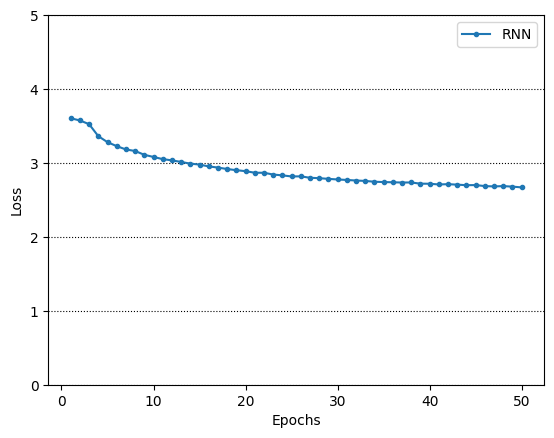

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_rnn)+1)
plt.plot(xs, val_losses_rnn, label="RNN", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 5.0])
plt.legend()
plt.show()

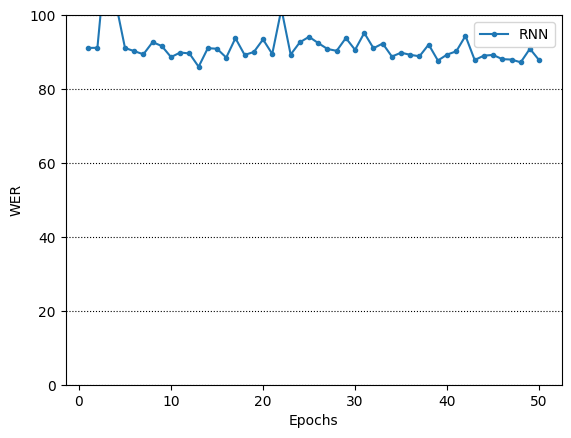

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_wers_rnn)+1)
plt.plot(xs, test_wers_rnn, label="RNN", marker=".")
plt.xlabel("Epochs")
plt.ylabel("WER")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()